### Mijozning noroziligini (customer churn) aniqlash

Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score


In [32]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

Dataset 20 ta ustundan iborat. Har bir ustun nimani anglatishi yuqoridagi Excel faylning boshqa sahifasida saqlangan.

In [7]:
description = pd.read_excel(url, sheet_name="Data Dict",header=1,usecols=[1,2,3])

description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


Ma'lumotlarni tahlil qilamiz

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


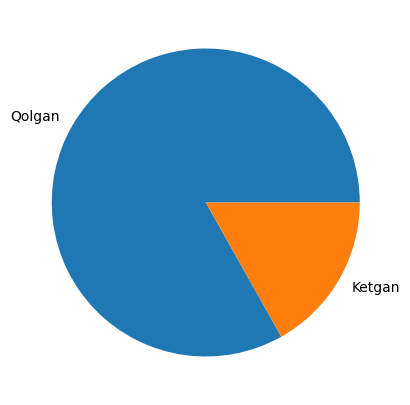

In [13]:
churn_rate = df['Churn'].value_counts() / len(df)*100

plt.figure(figsize=(5,5))
plt.pie(churn_rate,labels=['Qolgan','Ketgan'])
plt.show()

Ba'zi sonli ustunlarni tahlil qilib ko'ramiz

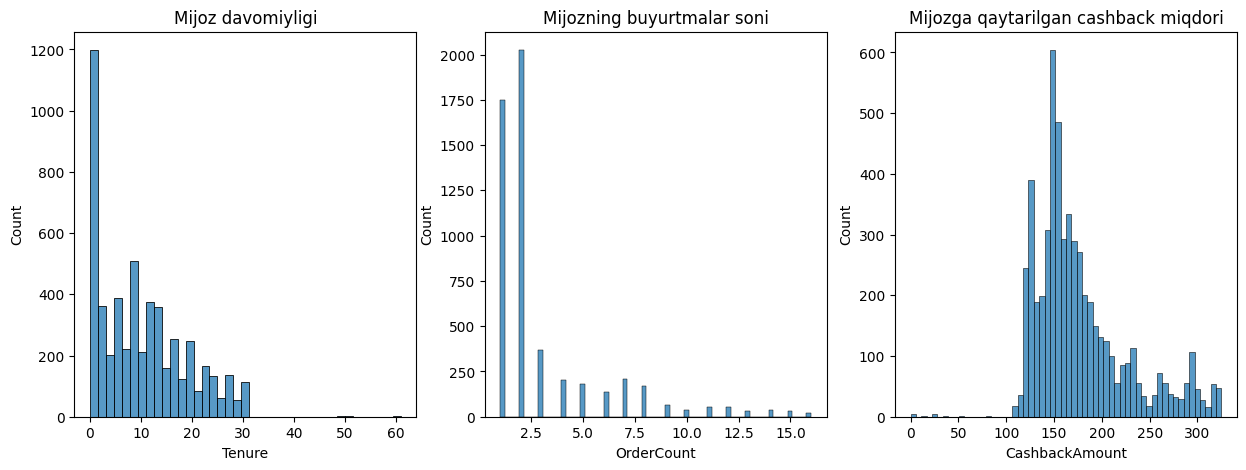

In [17]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

# Tenure
sns.histplot(df['Tenure'],ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

# Order count
sns.histplot(df['OrderCount'],ax=axes[1])
axes[1].set_title("Mijozning buyurtmalar soni")

#Cashback
sns.histplot(df['CashbackAmount'],ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")
plt.show()

Kategoriyali ustunlarni tahlil qilamiz

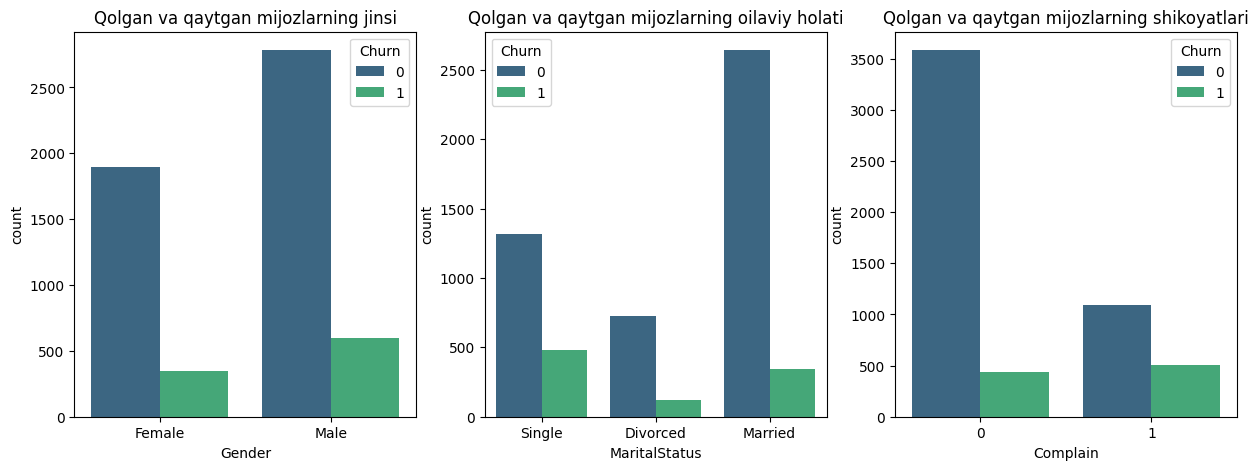

In [21]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='MaritalStatus',hue='Churn',palette='viridis', data=df,ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning oilaviy holati")

sns.countplot(x='Gender',hue='Churn',palette='viridis', data=df,ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozlarning jinsi")

sns.countplot(x='Complain',hue='Churn',palette='viridis', data=df,ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozlarning shikoyatlari")

plt.show()

In [23]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corrwith(df['Churn']).abs().sort_values(ascending=False)
print(correlation)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64


Ma'lumotlarga ishlov berish

In [26]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isna().sum().sum()}")

missing_rows = df[df.isnull().any(axis=1)].shape[0]

print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%


In [37]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [38]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")

missing_rows = data[data.isnull().any(axis=1)].shape[0]

print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [39]:
data = data.dropna()

data.shape

data['Churn'].value_counts() / len(data)

,count
Churn,
0,0.839296
1,0.160704


ML ga tayyorgarlik. Matnli ustunlarni songa o'tkazmiz

In [41]:
encoded = pd.get_dummies(data)
encoded.head()

X = encoded.drop('Churn',axis=1)
y = encoded['Churn']

scaler = StandardScaler()
X = scaler.fit_transform(X)

Train / Test split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       849
           1       0.75      0.38      0.50       163

    accuracy                           0.88      1012
   macro avg       0.82      0.68      0.72      1012
weighted avg       0.87      0.88      0.86      1012

Model aniqligi: 0.8794466403162056


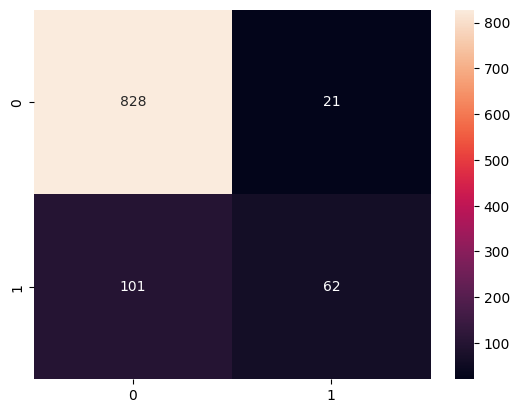

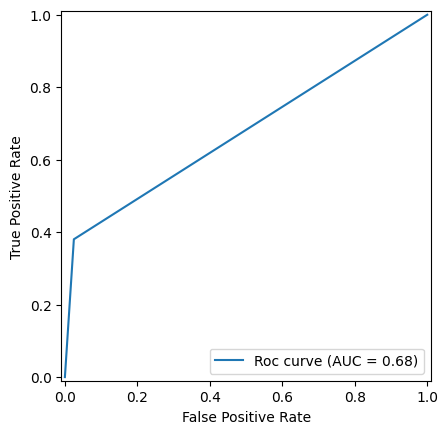

In [46]:
# Model yaratish va o'qitish

LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

# Bashorat
y_pred = LR_model.predict(X_test)

print(classification_report(y_test,y_pred))
print(f"Model aniqligi: {metrics.accuracy_score(y_test,y_pred)}")

# Conifusion Matrix
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

# Roc curve
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc curve')
display.plot()
plt.show()

Support Vector Machines

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       849
           1       0.67      0.31      0.42       163

    accuracy                           0.86      1012
   macro avg       0.77      0.64      0.67      1012
weighted avg       0.85      0.86      0.84      1012

Model aniqligi: 0.8636363636363636


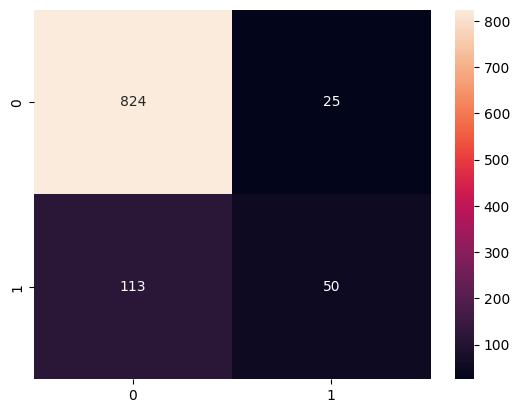

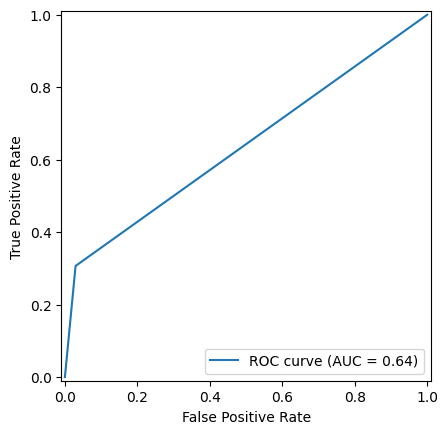

In [50]:
# Modelni yaratamiz va o'qitamiz
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.89      0.86       163

    accuracy                           0.95      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.95      0.96      1012

Model aniqligi: 0.9545454545454546


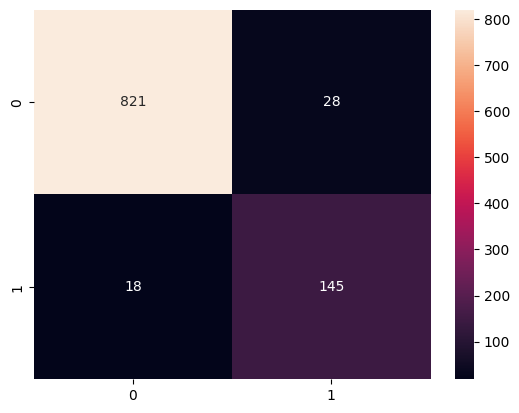

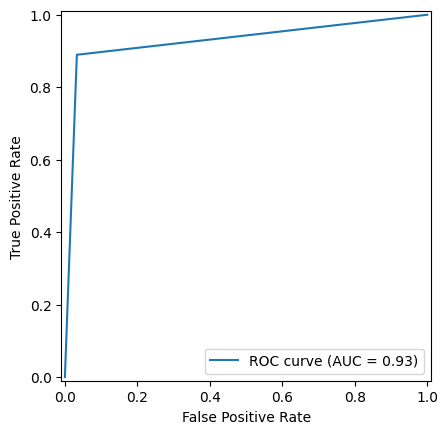

In [51]:
# Modelni yaratamiz va o'qitamiz
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

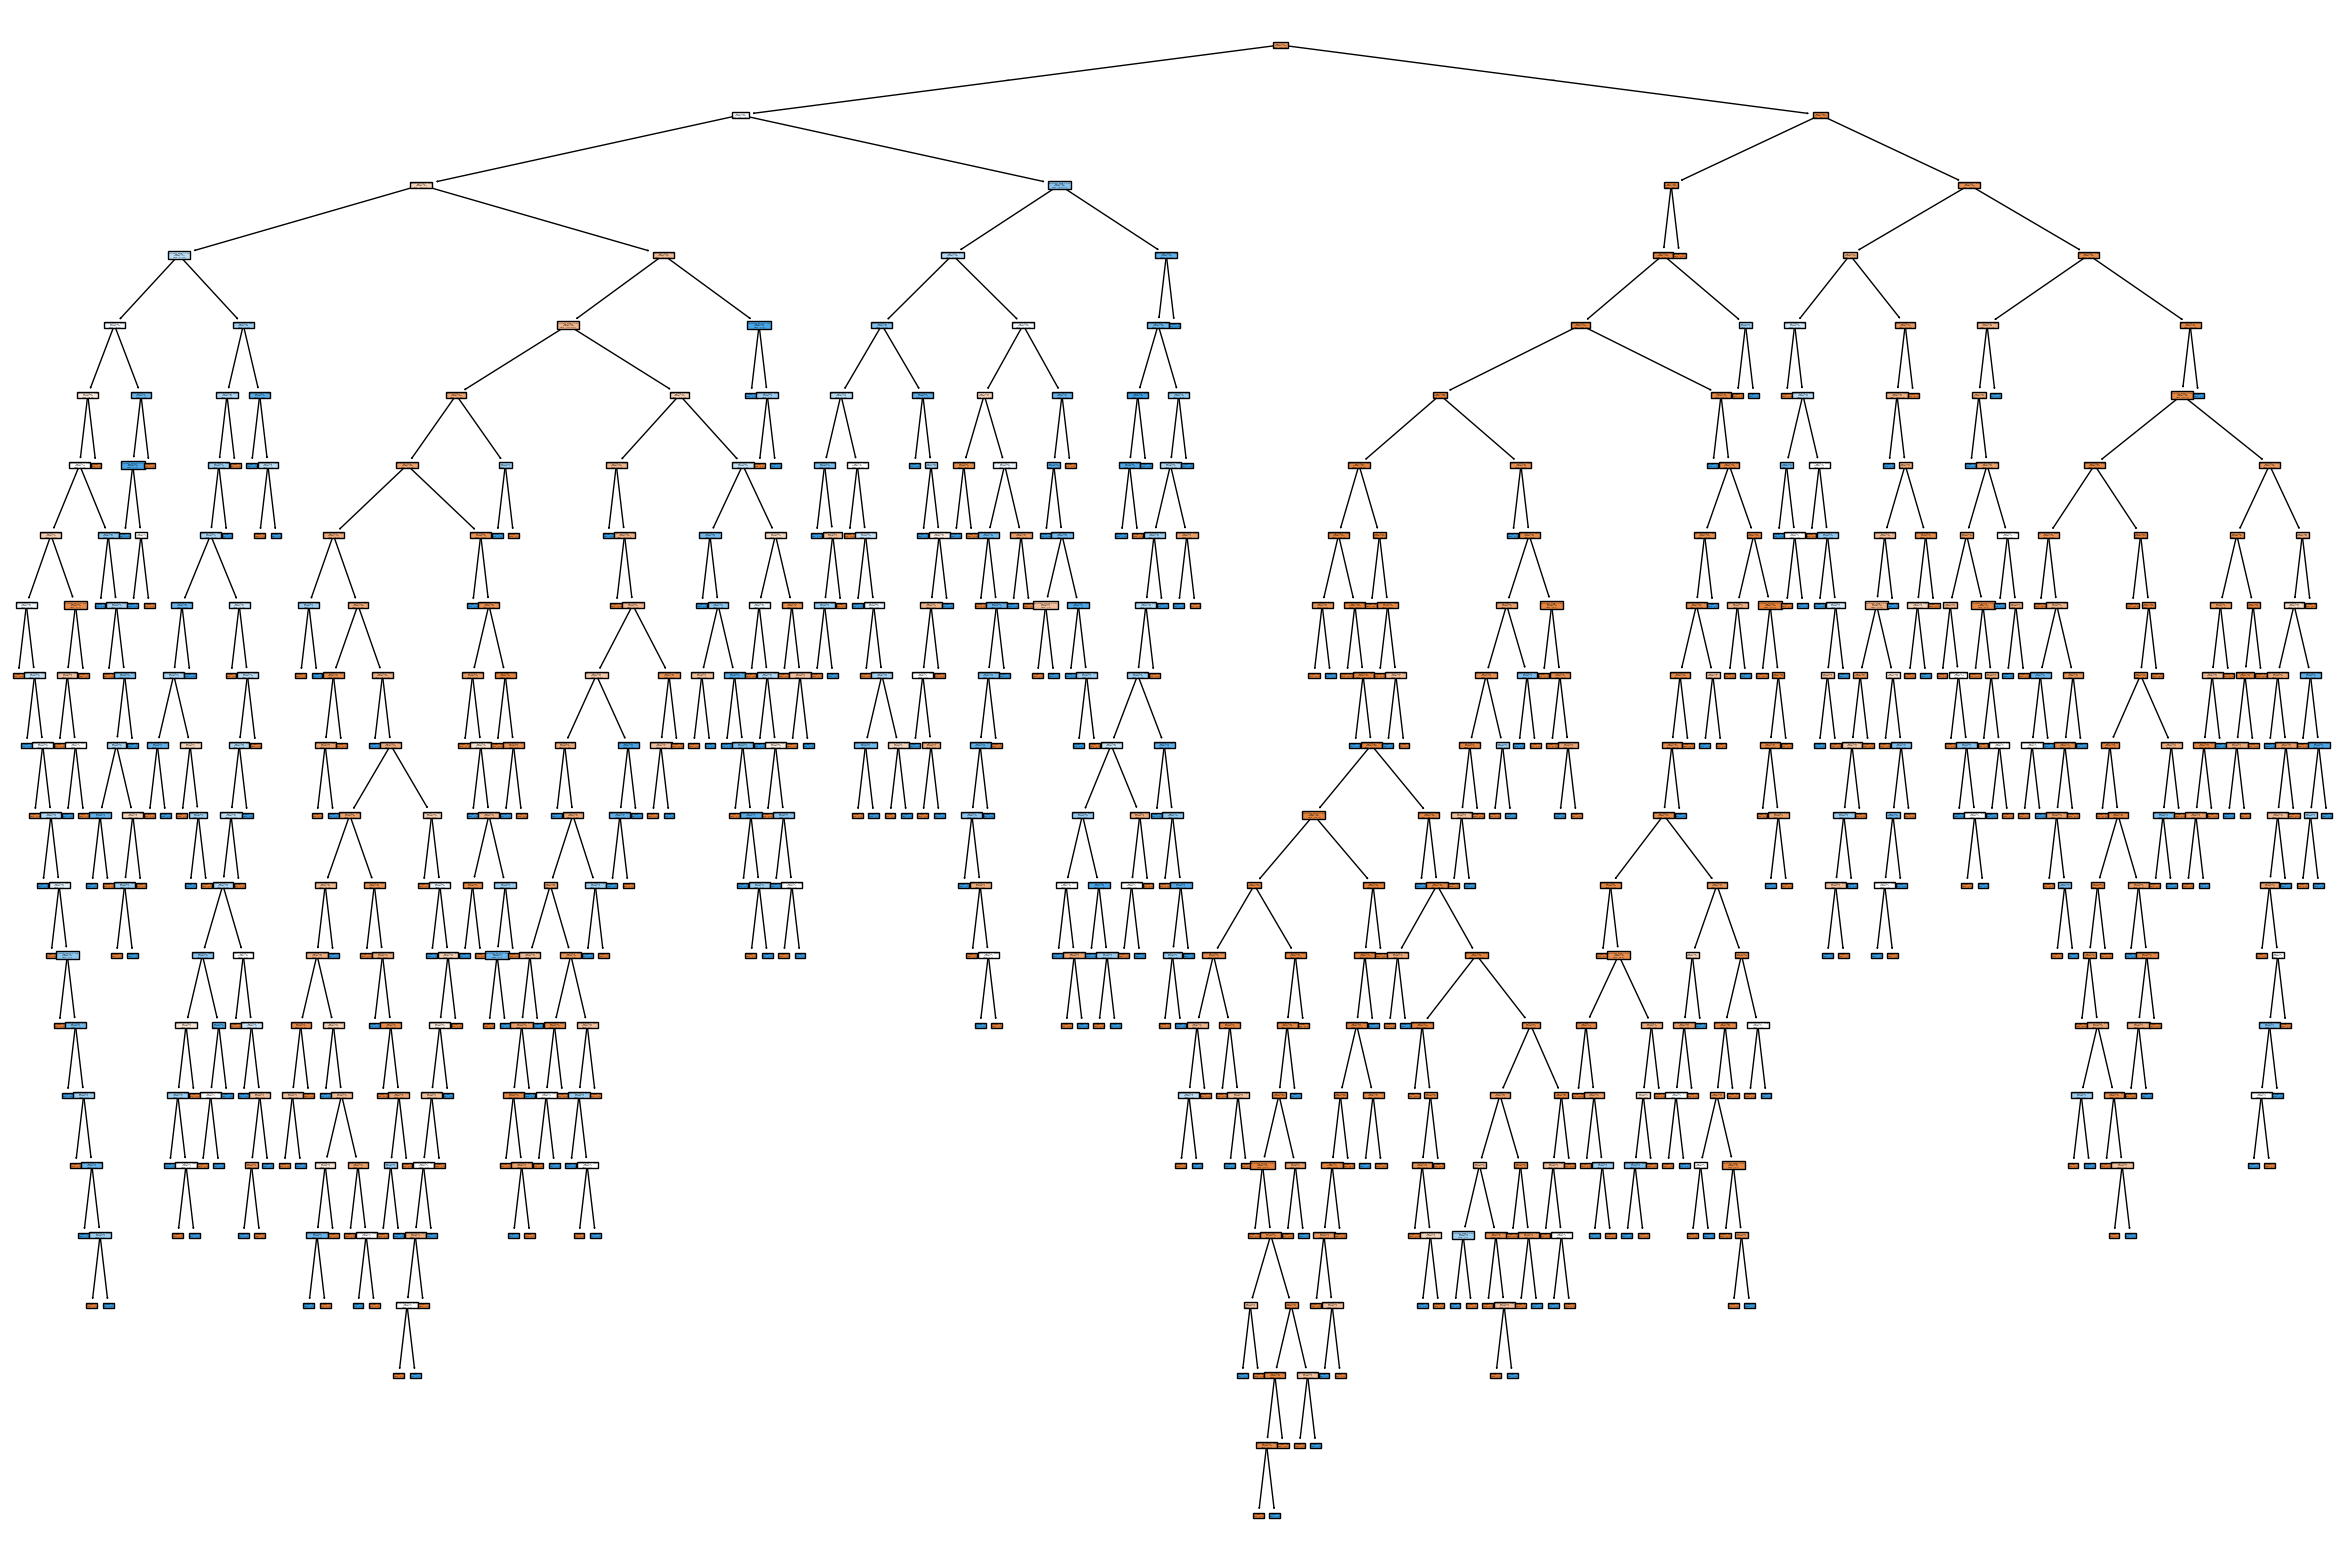

In [52]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       849
           1       0.87      0.83      0.85       163

    accuracy                           0.95      1012
   macro avg       0.92      0.90      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi: 0.9515810276679841


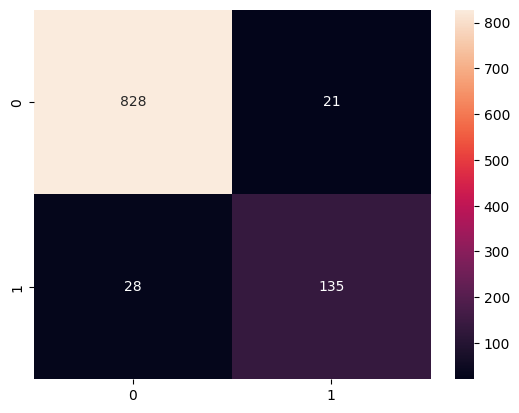

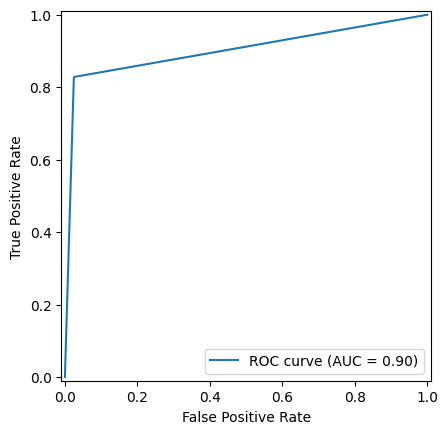

In [53]:
# Modelni yaratamiz va o'qitamiz
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.87      0.77      0.82       163

    accuracy                           0.94      1012
   macro avg       0.91      0.88      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.9446640316205533


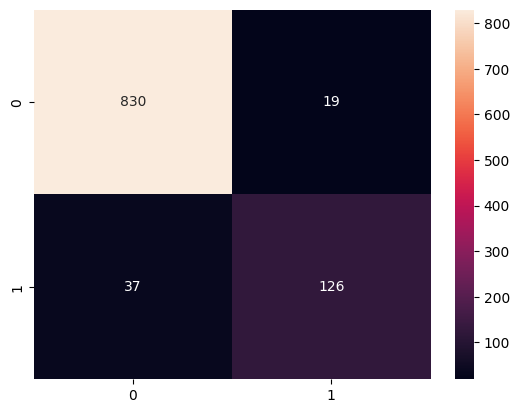

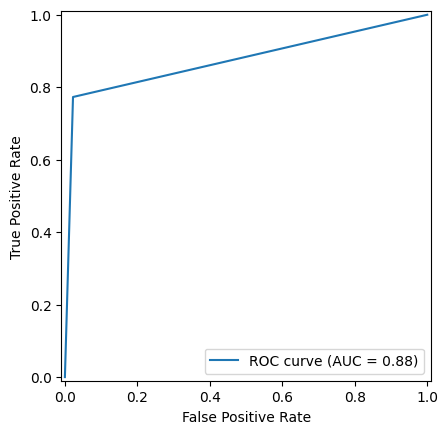

In [54]:
# Modelni yaratamiz va o'qitamiz
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()